### Choose your path

In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
exp_name = "VL1grF"#"NA9R2F"#"VL1grF"#"EXgr"EXgrF EXgrT

In [3]:
#current_dir = "./data/Seul/"
#current_dir = 'F:/Virginie/Camera/Feuille/'
current_dir = "/home/plavainne/Documents/BIM/06022020/06022020/"

In [4]:
pwd

'/home/plavainne/Documents/BIM/06022020/06022020'

## Load libraries

In [34]:
%matplotlib inline
import spectral as sp
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from spectrum import rank_normalizer,scale_max_min,scale_white_dark,plot_spectra,zoom
from spectrum_ml import cluster_pixels_kmeans,detect_aphid,blob_detector

###  Get wave lengths

In [6]:
#wave_lengths = pd.read_csv("wave_lengths.csv",index_col=0,sep=';',header=None)[1]
wave_lengths = pd.read_csv("wave_lengths.csv",index_col=0,header=None)[1]

## Load the dataset

In [7]:
image_path = current_dir+exp_name+'/capture/'+exp_name+'.hdr'
dark_ref_path = current_dir+exp_name+'/capture/DARKREF_'+exp_name+'.hdr'
white_ref_path = current_dir+exp_name+'/capture/WHITEREF_'+exp_name+'.hdr'

In [8]:
img = sp.open_image(image_path)

dark_ref = sp.open_image(dark_ref_path)
dark_spectrum = dark_ref.asarray().reshape(-1,dark_ref.shape[2]).mean(axis=0)

white_ref = sp.open_image(white_ref_path)
white_spectrum = white_ref.asarray().reshape(-1,white_ref.shape[2]).mean(axis=0)

/home/plavainne/.local/lib/python3.7/site-packages/spectral/io/envi.py:175: UserWarning: Parameters with non-lowercase names encountered and converted to lowercase. To retain source file parameter name capitalization, set spectral.settings.envi_support_nonlowercase_params to True.
  warnings.warn(msg)


### Normalize

In [9]:
img_norm = scale_white_dark(img.asarray(),dark_spectrum=dark_spectrum,white_spectrum=white_spectrum)
img_norm = scale_max_min(img_norm)

In [10]:
img_norm_reshape = img_norm.reshape(-1,img_norm.shape[-1])
#img_norm_reshape = rank_normalizer(img_norm_reshape)

### Plot the image

(928, 1024, 448)


/home/plavainne/.local/lib/python3.7/site-packages/spectral/graphics/spypylab.py:27: MatplotlibDeprecationWarning: 
The keymap.all_axes rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  mpl.rcParams['keymap.all_axes'] = ''


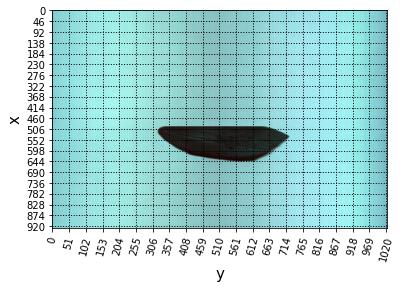

In [11]:
#img = img[100:500,200:700]
print(img.shape)
plot_spectra(img,  wave_lengths=(29,113,227), grid_step=20)

## Automatic detection of aphids
### Cluster pixels

In [12]:
pixels_sample = img_norm_reshape[np.random.choice(img_norm_reshape.shape[0], 5000, replace=False)]
km = cluster_pixels_kmeans(pixels_sample,10)

In [13]:
c = km.predict(img_norm_reshape)

<AxesSubplot:>

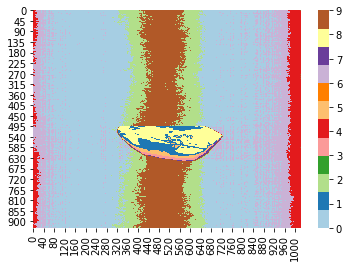

In [14]:
sns.heatmap(c.reshape(img_norm.shape[:2]),cmap='Paired')

### evaluate clusters

In [15]:
cluster_scores = detect_aphid(km.cluster_centers_,
                 model_files=["ML_models/model_vae_1Dconv"],
                 svm_model_pf='ML_models/SVM_pf_rank.model',
                 svm_model_p='ML_models/SVM_p_rank.model')

In [16]:
best_cluster = np.argmax(cluster_scores)
############################################
# Changer le cluster si besoin
#best_cluster = 0
############################################
print(best_cluster)

5


Text(0, 0.5, 'Aphid Score')

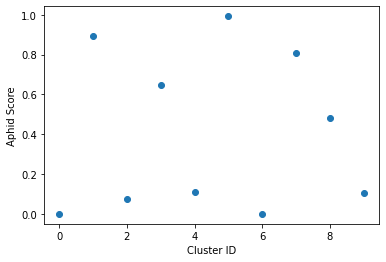

In [17]:
plt.plot(cluster_scores,"o")
plt.xlabel("Cluster ID")
plt.ylabel("Aphid Score")


<AxesSubplot:>

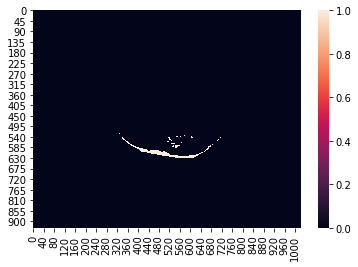

In [18]:
sns.heatmap((c==best_cluster).reshape(img_norm.shape[:2]))

 ### Evaluate chosen pixels

In [19]:
chosen_pixels = img_norm_reshape[(c==best_cluster)]
scores_aphids = detect_aphid(chosen_pixels,
                             model_files=["ML_models/model_vae_1Dconv"],
                             svm_model_pf='ML_models/SVM_pf_rank.model',
                             svm_model_p='ML_models/SVM_p_rank.model')

/home/plavainne/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Aphid score')

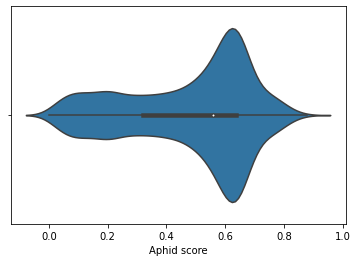

In [20]:
sns.violinplot(scores_aphids)
plt.xlabel("Aphid score")

In [21]:
cc = pd.Series(c.copy())
cc[c!=best_cluster] = 0
cc[c==best_cluster] = 1
cc[c==best_cluster] *= scores_aphids
#cc2 = cc >0.7#> np.percentile(cc,99.9)

<AxesSubplot:>

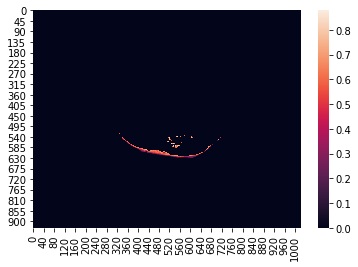

In [22]:
sns.heatmap(cc.values.reshape(img_norm.shape[:2]))
#sns.heatmap(cc2.values.reshape(img_norm.shape[:2]))

# Get blobs

In [23]:
img_zoom.shape

NameError: name 'img_zoom' is not defined

In [26]:
blobs_dog = blob_detector((cc).values.reshape(img_norm.shape[:2]),
                          min_sigma=1., max_sigma=1.5, threshold=0.1, overlap=0.5)

In [27]:
len(blobs_dog)

78

# Label the patches

+ Definir les patchs qui n'ont pas de pucerons

In [28]:
labels = [1 for i in range(len(blobs_dog))]
patches = []
##########################
# Definir les ids des patches qui N'ONT PAS d'aphids ici:
false_labels = []
##########################
for i in false_labels:
    labels = 0

/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<Figure size 432x288 with 0 Axes>

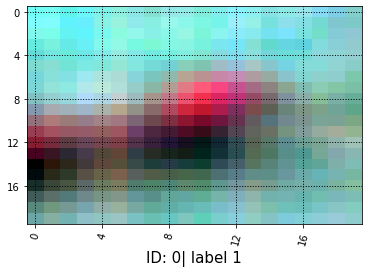

<Figure size 432x288 with 0 Axes>

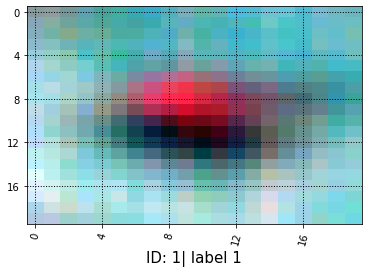

<Figure size 432x288 with 0 Axes>

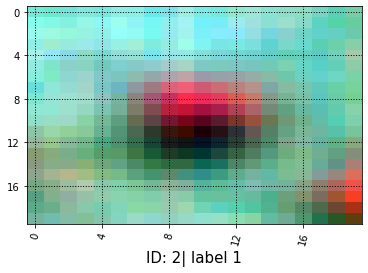

<Figure size 432x288 with 0 Axes>

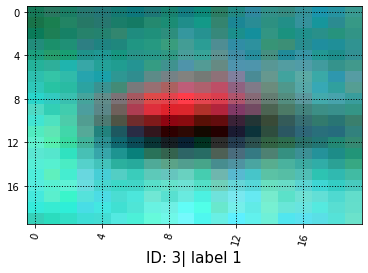

<Figure size 432x288 with 0 Axes>

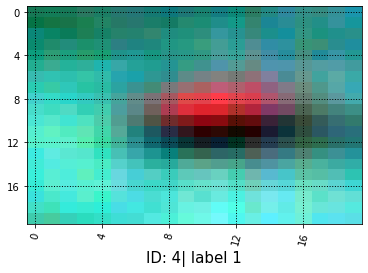

<Figure size 432x288 with 0 Axes>

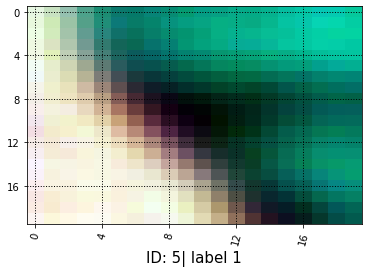

<Figure size 432x288 with 0 Axes>

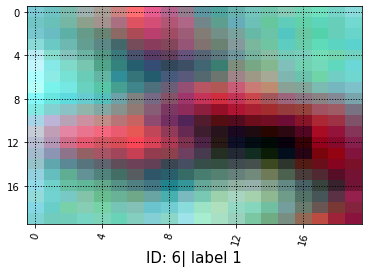

<Figure size 432x288 with 0 Axes>

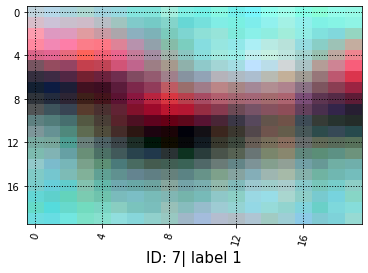

<Figure size 432x288 with 0 Axes>

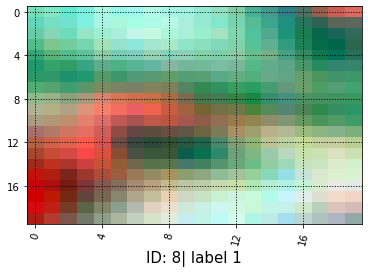

<Figure size 432x288 with 0 Axes>

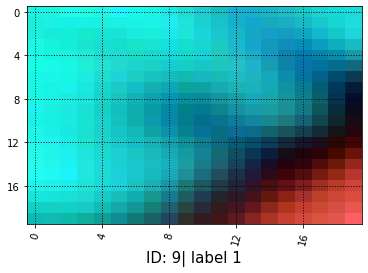

<Figure size 432x288 with 0 Axes>

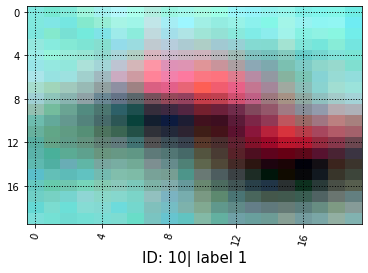

<Figure size 432x288 with 0 Axes>

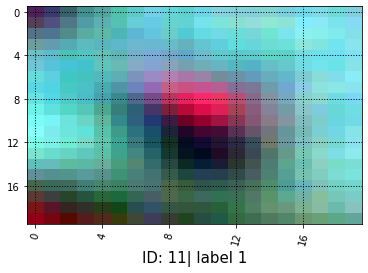

<Figure size 432x288 with 0 Axes>

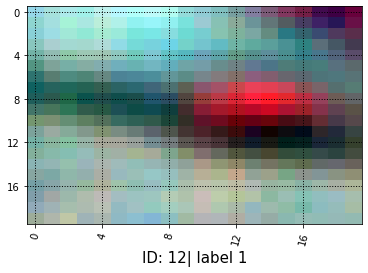

<Figure size 432x288 with 0 Axes>

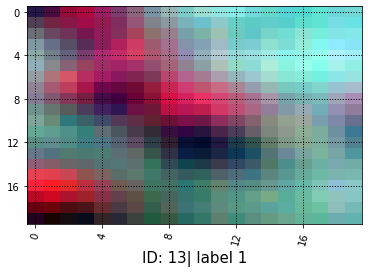

<Figure size 432x288 with 0 Axes>

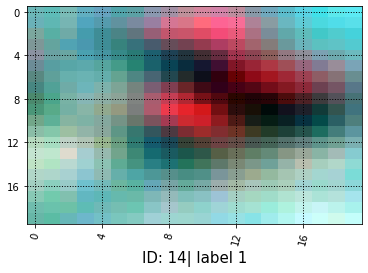

<Figure size 432x288 with 0 Axes>

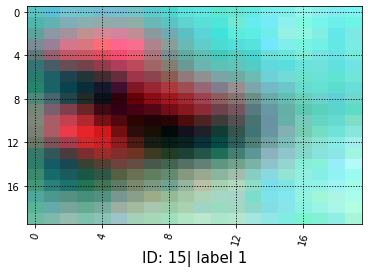

<Figure size 432x288 with 0 Axes>

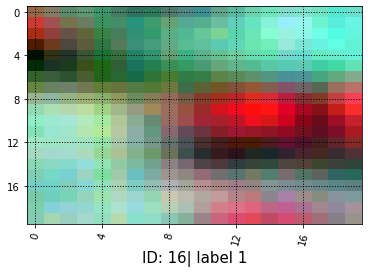

<Figure size 432x288 with 0 Axes>

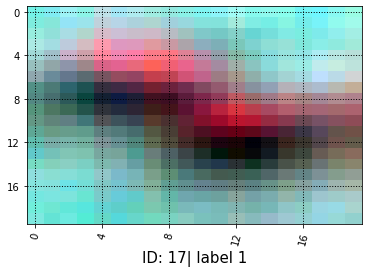

<Figure size 432x288 with 0 Axes>

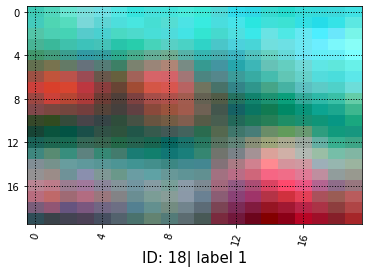

<Figure size 432x288 with 0 Axes>

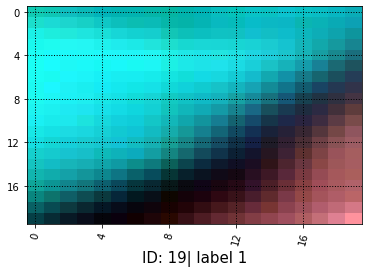

<Figure size 432x288 with 0 Axes>

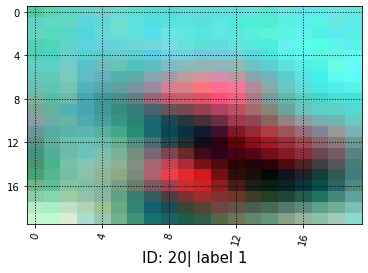

<Figure size 432x288 with 0 Axes>

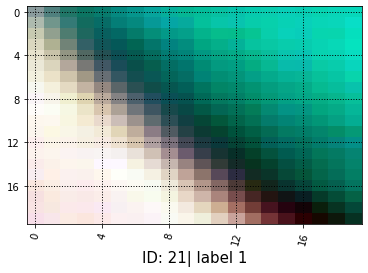

<Figure size 432x288 with 0 Axes>

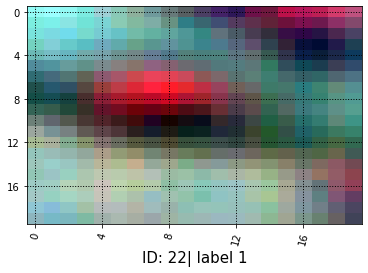

<Figure size 432x288 with 0 Axes>

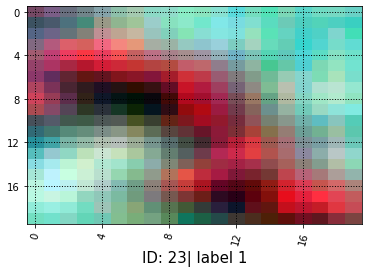

<Figure size 432x288 with 0 Axes>

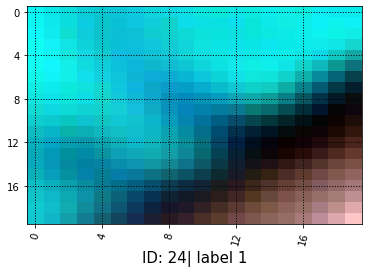

<Figure size 432x288 with 0 Axes>

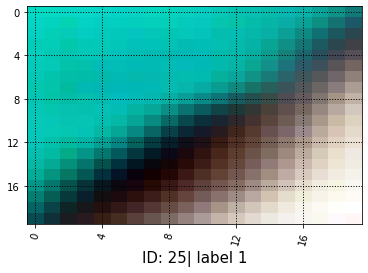

<Figure size 432x288 with 0 Axes>

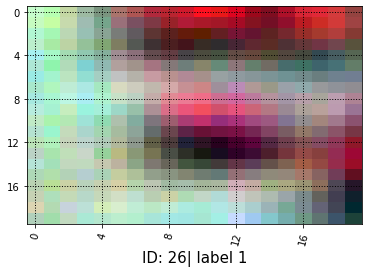

<Figure size 432x288 with 0 Axes>

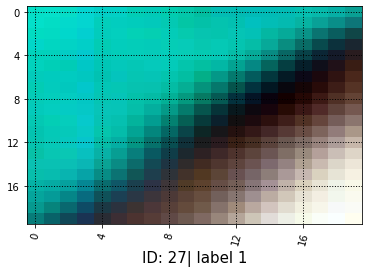

<Figure size 432x288 with 0 Axes>

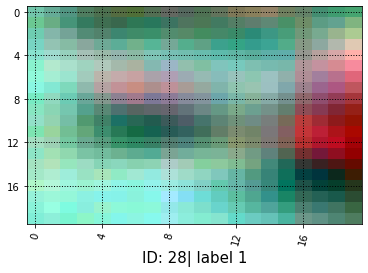

<Figure size 432x288 with 0 Axes>

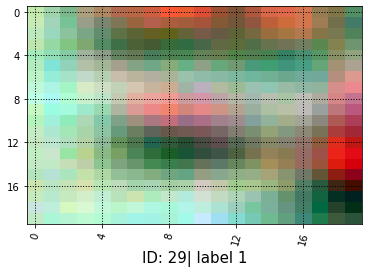

<Figure size 432x288 with 0 Axes>

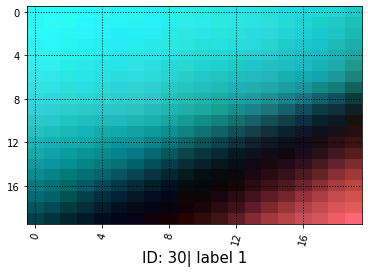

<Figure size 432x288 with 0 Axes>

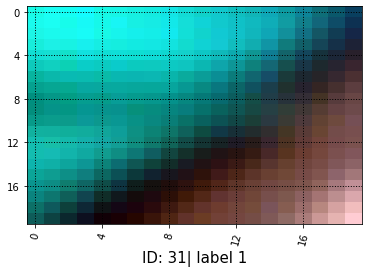

<Figure size 432x288 with 0 Axes>

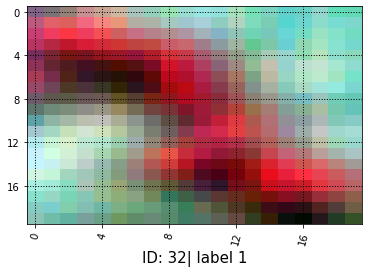

<Figure size 432x288 with 0 Axes>

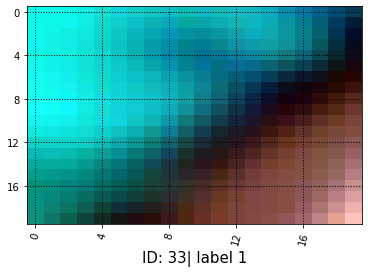

<Figure size 432x288 with 0 Axes>

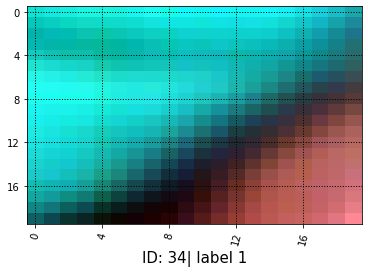

<Figure size 432x288 with 0 Axes>

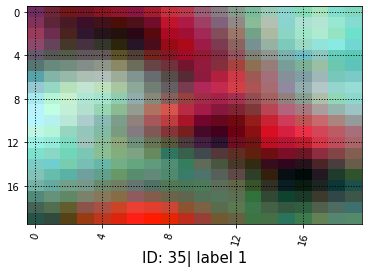

<Figure size 432x288 with 0 Axes>

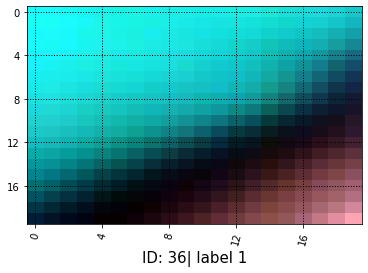

<Figure size 432x288 with 0 Axes>

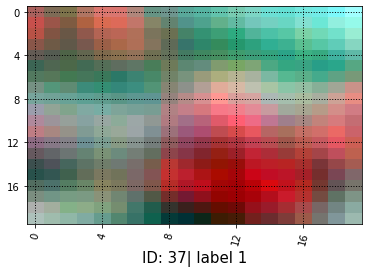

<Figure size 432x288 with 0 Axes>

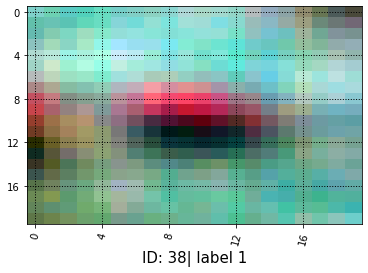

<Figure size 432x288 with 0 Axes>

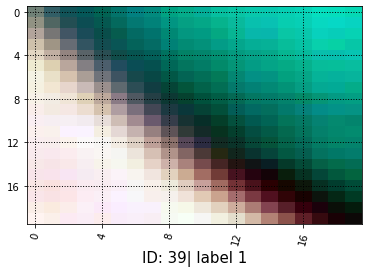

<Figure size 432x288 with 0 Axes>

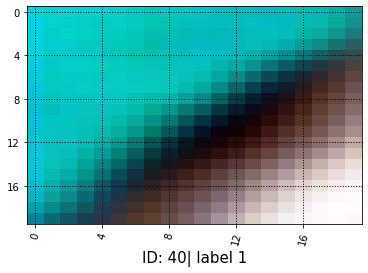

<Figure size 432x288 with 0 Axes>

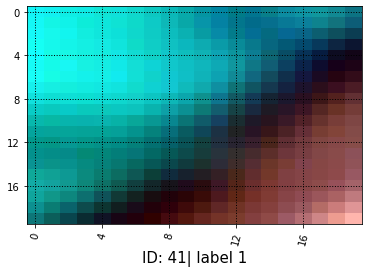

<Figure size 432x288 with 0 Axes>

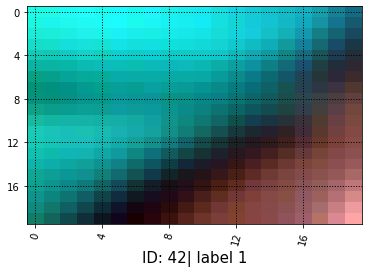

<Figure size 432x288 with 0 Axes>

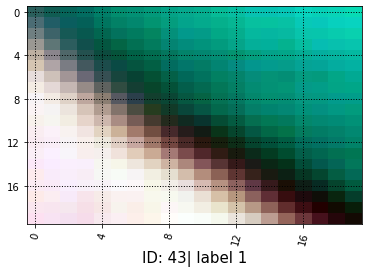

<Figure size 432x288 with 0 Axes>

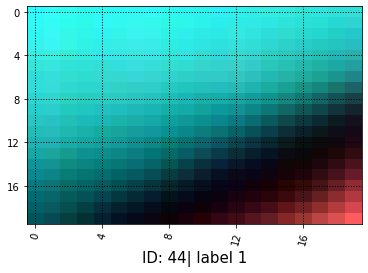

<Figure size 432x288 with 0 Axes>

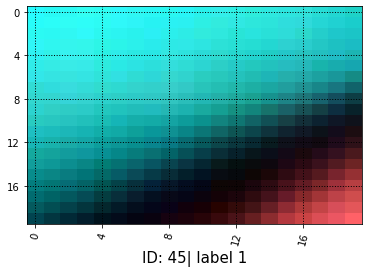

<Figure size 432x288 with 0 Axes>

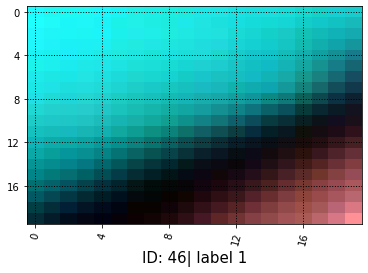

<Figure size 432x288 with 0 Axes>

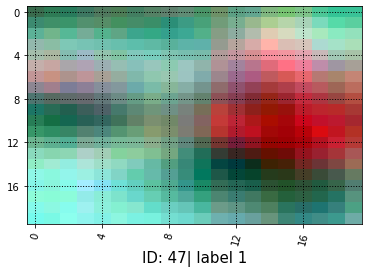

<Figure size 432x288 with 0 Axes>

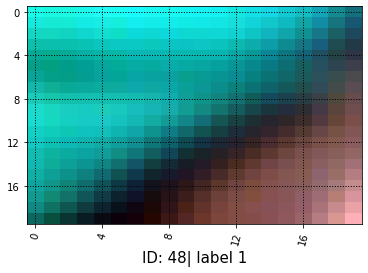

<Figure size 432x288 with 0 Axes>

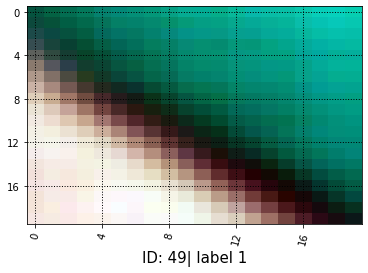

<Figure size 432x288 with 0 Axes>

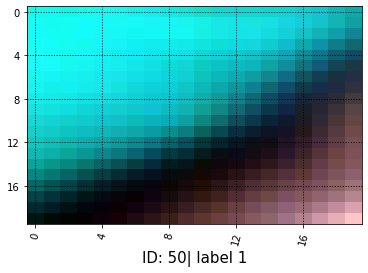

<Figure size 432x288 with 0 Axes>

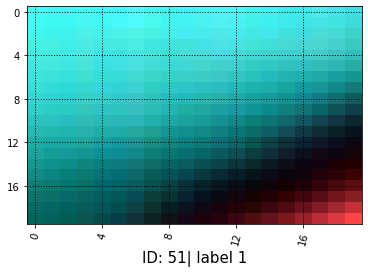

<Figure size 432x288 with 0 Axes>

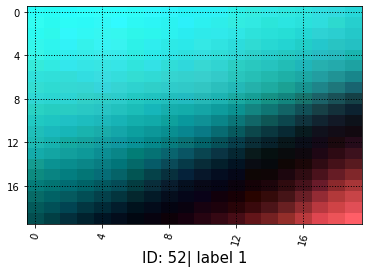

<Figure size 432x288 with 0 Axes>

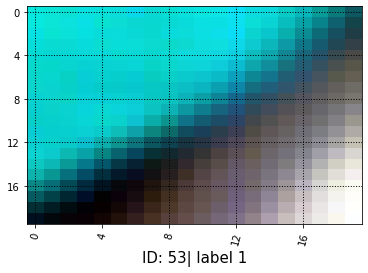

<Figure size 432x288 with 0 Axes>

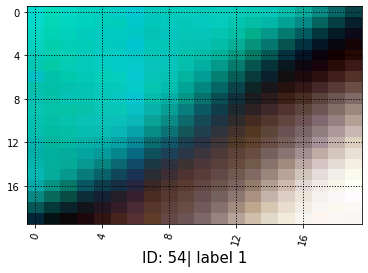

<Figure size 432x288 with 0 Axes>

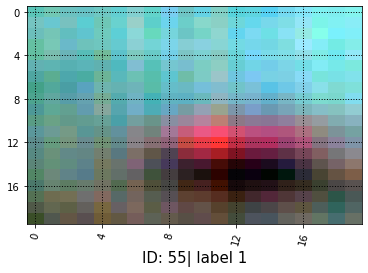

<Figure size 432x288 with 0 Axes>

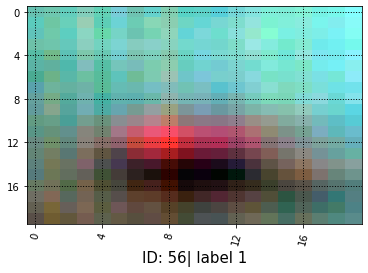

<Figure size 432x288 with 0 Axes>

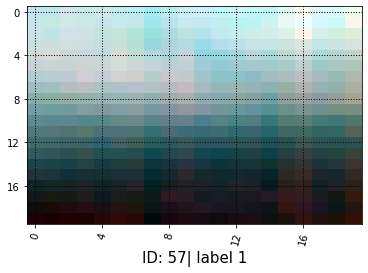

<Figure size 432x288 with 0 Axes>

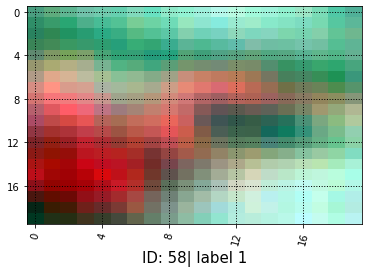

<Figure size 432x288 with 0 Axes>

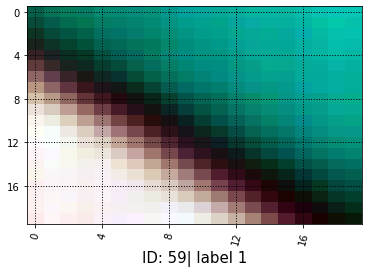

<Figure size 432x288 with 0 Axes>

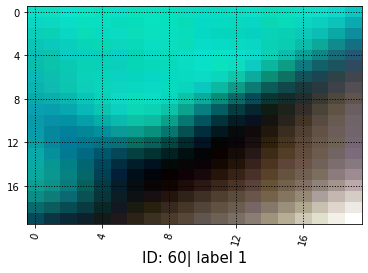

<Figure size 432x288 with 0 Axes>

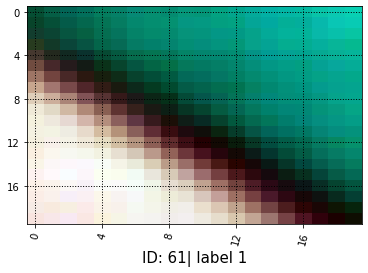

<Figure size 432x288 with 0 Axes>

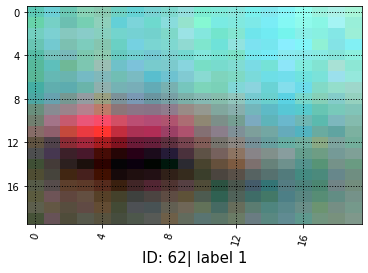

<Figure size 432x288 with 0 Axes>

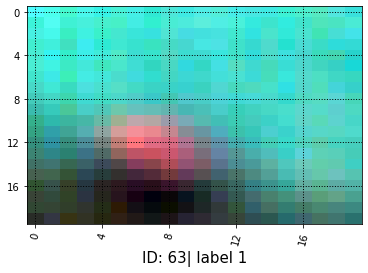

<Figure size 432x288 with 0 Axes>

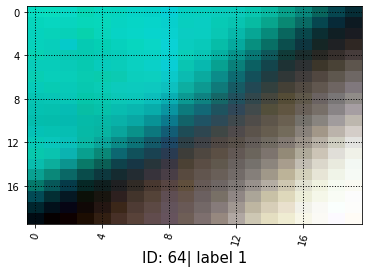

<Figure size 432x288 with 0 Axes>

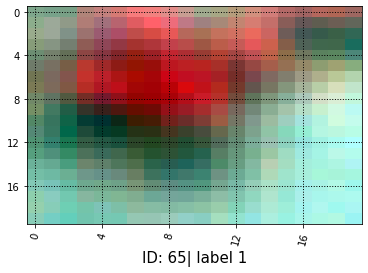

<Figure size 432x288 with 0 Axes>

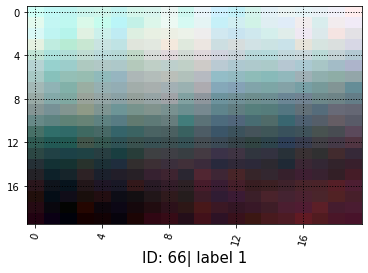

<Figure size 432x288 with 0 Axes>

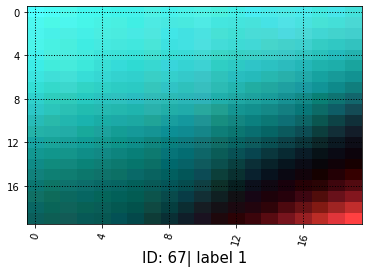

<Figure size 432x288 with 0 Axes>

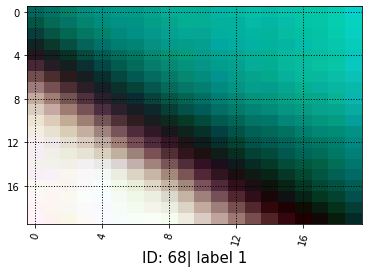

<Figure size 432x288 with 0 Axes>

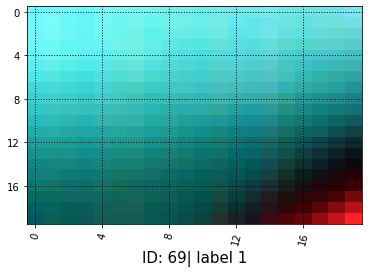

<Figure size 432x288 with 0 Axes>

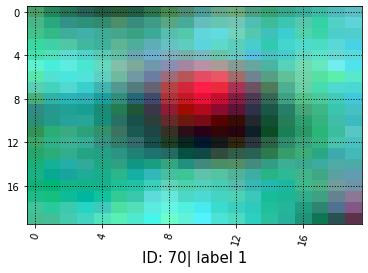

<Figure size 432x288 with 0 Axes>

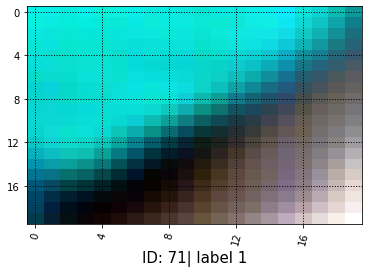

<Figure size 432x288 with 0 Axes>

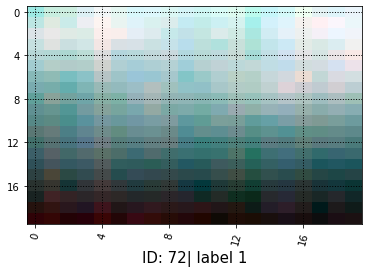

<Figure size 432x288 with 0 Axes>

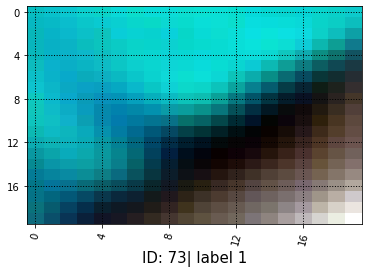

<Figure size 432x288 with 0 Axes>

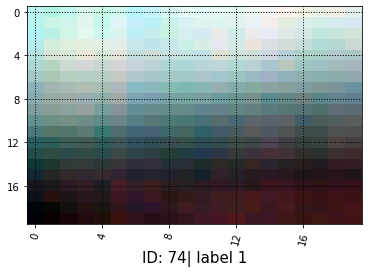

<Figure size 432x288 with 0 Axes>

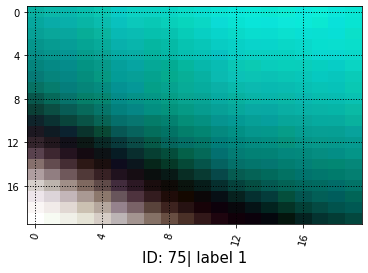

<Figure size 432x288 with 0 Axes>

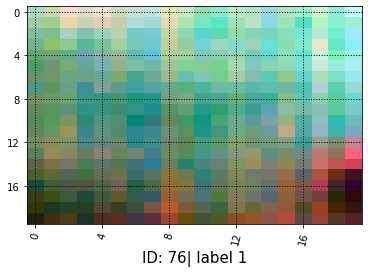

<Figure size 432x288 with 0 Axes>

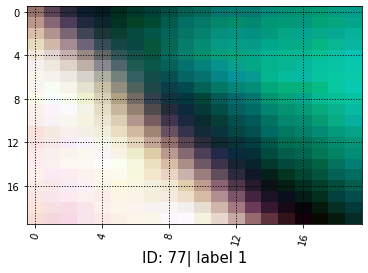

In [29]:
for i,blob in enumerate(blobs_dog):
    plt.figure()
    image = img
    img_zoom = zoom(blob,image)
    patches.append(img_zoom)
    plot_spectra(img_zoom,  wave_lengths=(202,331,427), grid_step=5)
    x_label = "ID: "+str(i)
    if len(labels)>i:
        x_label +=  "| label "+str(labels[i])
    plt.xlabel(x_label)
    plt.ylabel('')
    

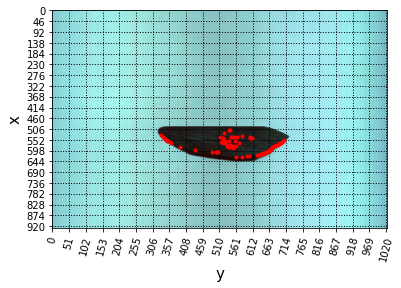

<Figure size 432x288 with 0 Axes>

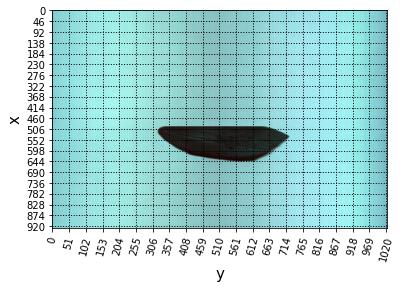

In [30]:
plot_spectra(img,  wave_lengths=(29,113,227), grid_step=20)
for blob in blobs_dog:
    plt.plot([blob[1]],[blob[0]],".r")
plt.figure()
plot_spectra(img,  wave_lengths=(29,113,227), grid_step=20)

# Save results

In [31]:
import pickle as p
p.dump(patches,open("patches_"+"cluster_"+str(best_cluster)+"_"+exp_name.split(".")[0]+".pickle","wb"))
p.dump(labels,open("labels_"+"cluster_"+str(best_cluster)+"_"+exp_name.split(".")[0]+".pickle","wb"))


# Création d'une page web

In [38]:
nbinteract auto_spectral_analyzer.ipynb -s SamLau95/nbinteract-image

SyntaxError: invalid syntax (<ipython-input-38-ccbffeb7d887>, line 1)

# Ne plus toucher

/Users/sergiopeignier/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


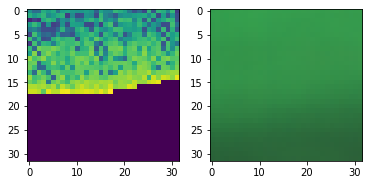

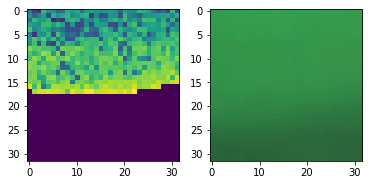

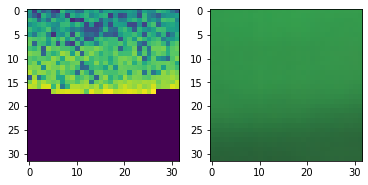

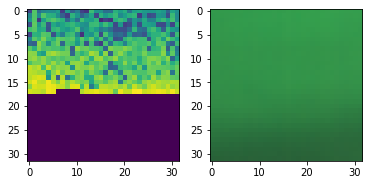

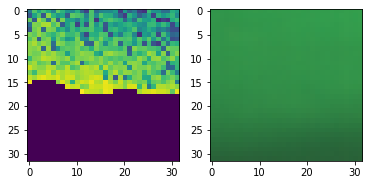

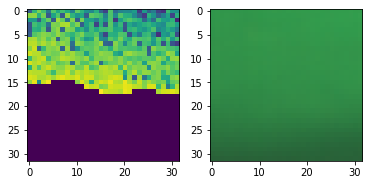

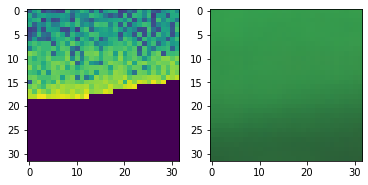

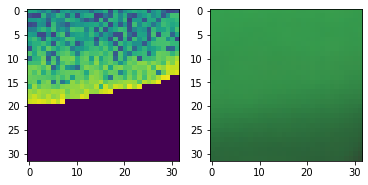

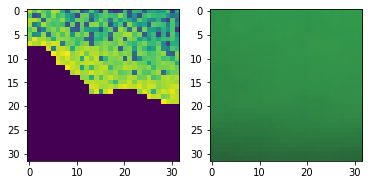

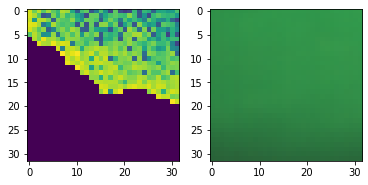

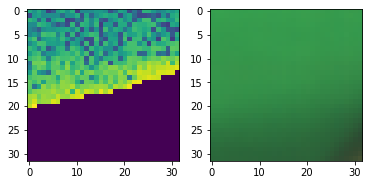

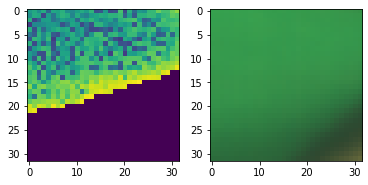

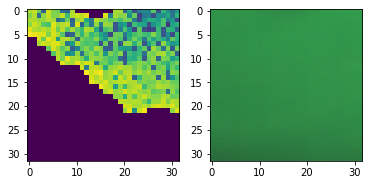

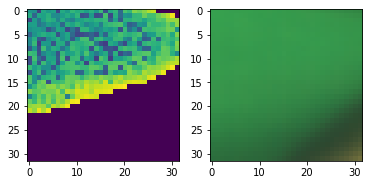

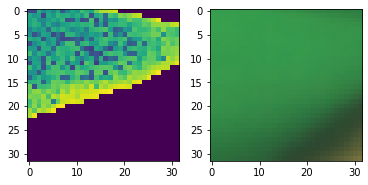

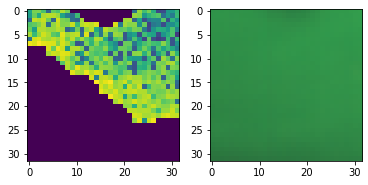

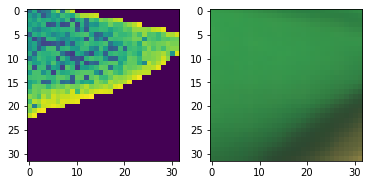

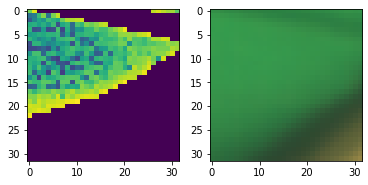

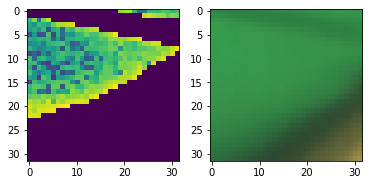

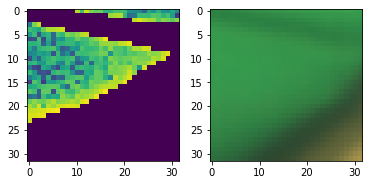

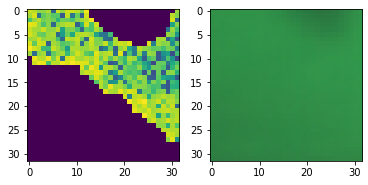

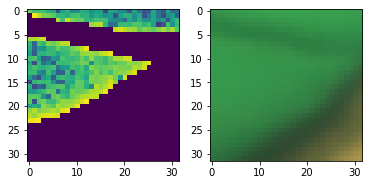

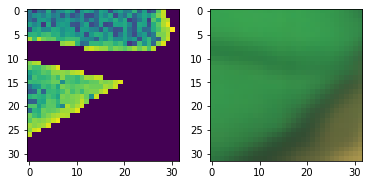

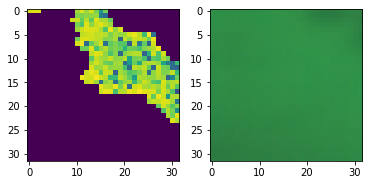

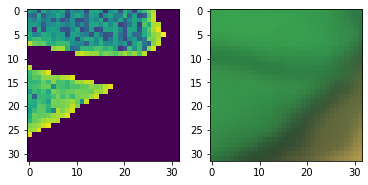

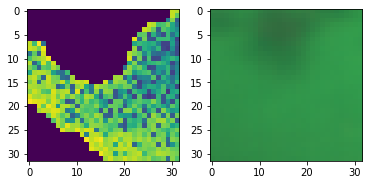

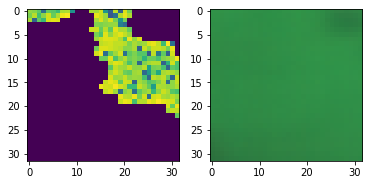

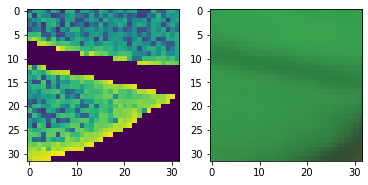

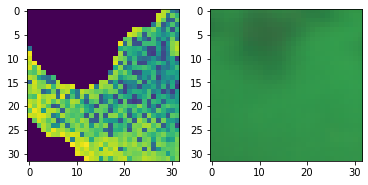

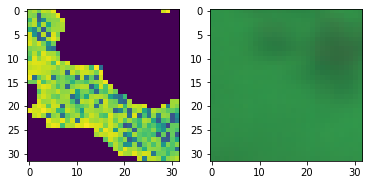

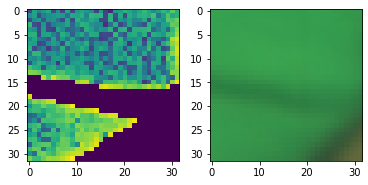

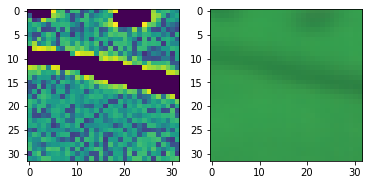

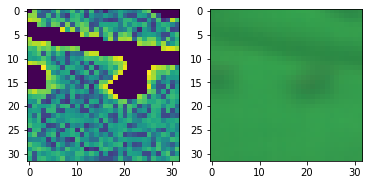

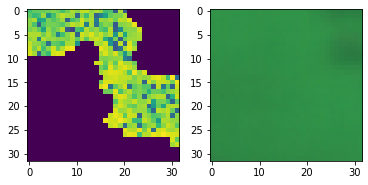

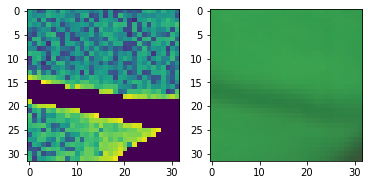

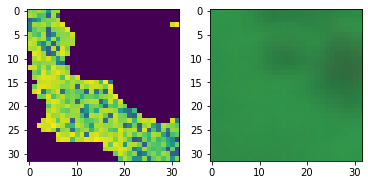

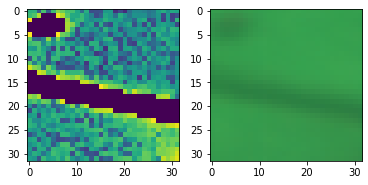

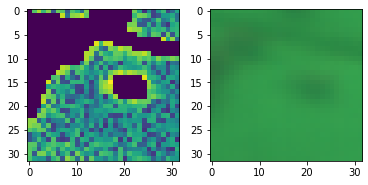

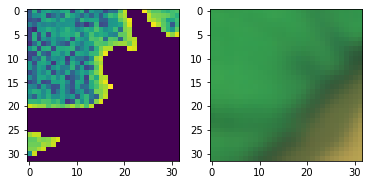

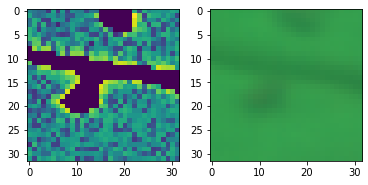

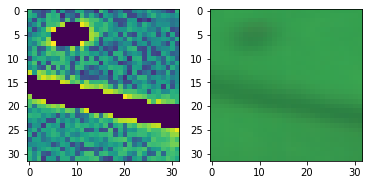

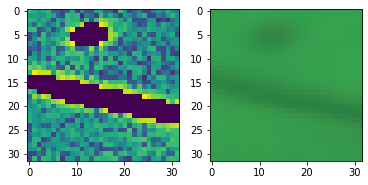

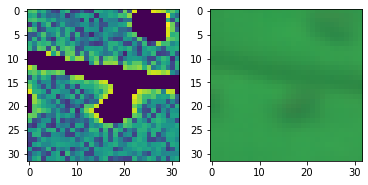

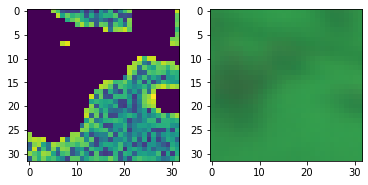

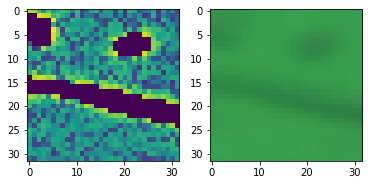

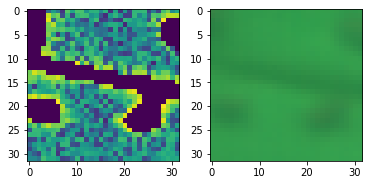

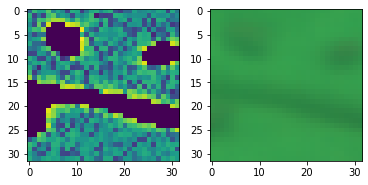

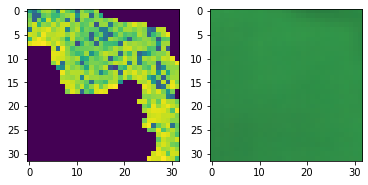

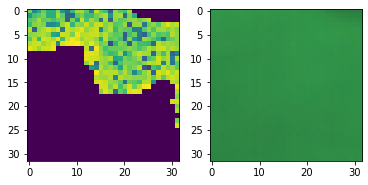

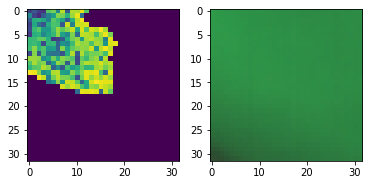

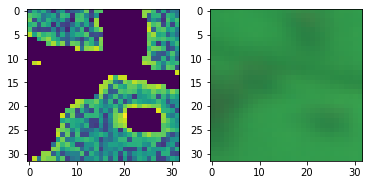

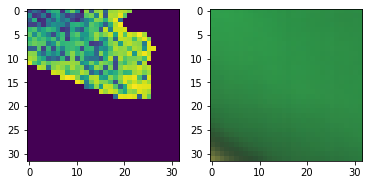

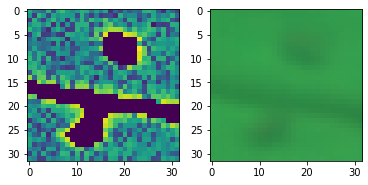

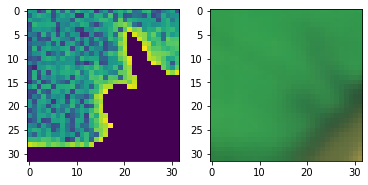

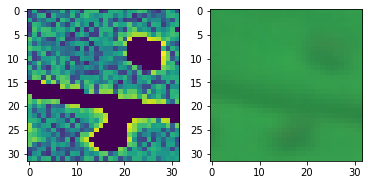

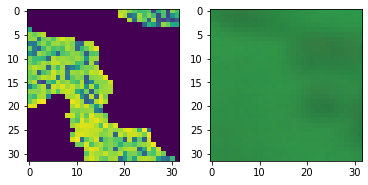

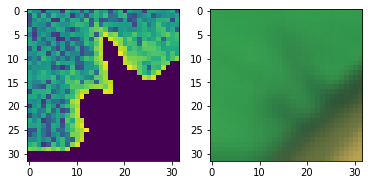

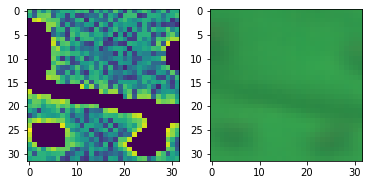

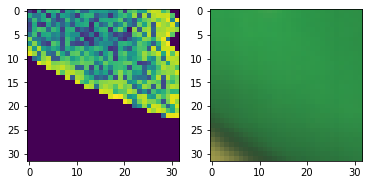

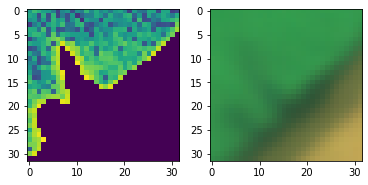

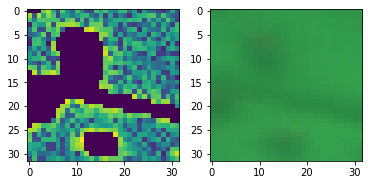

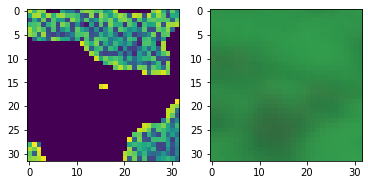

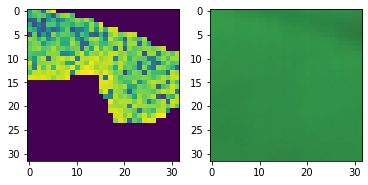

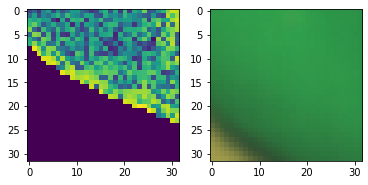

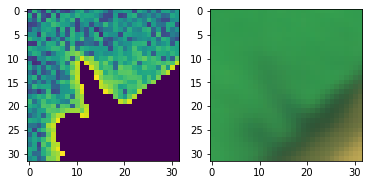

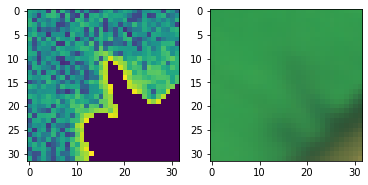

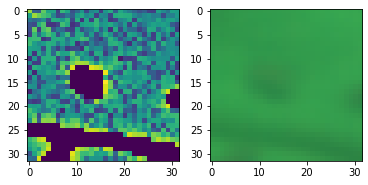

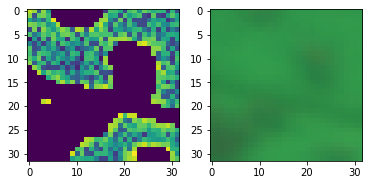

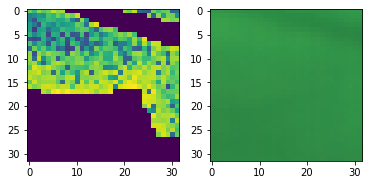

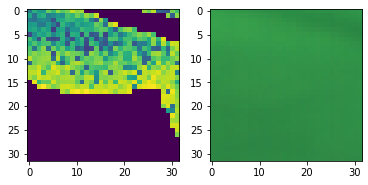

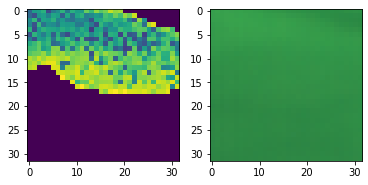

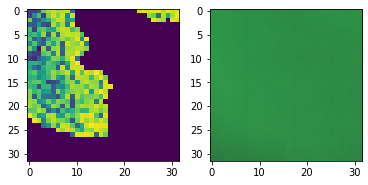

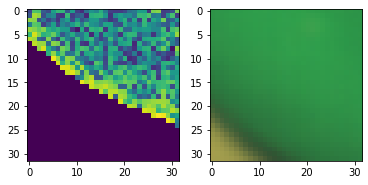

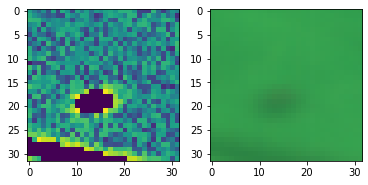

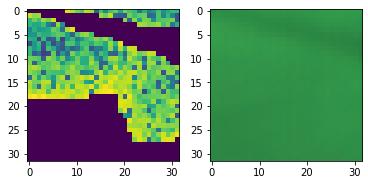

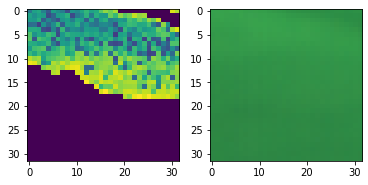

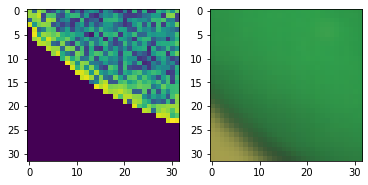

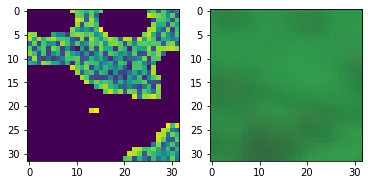

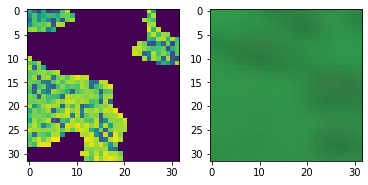

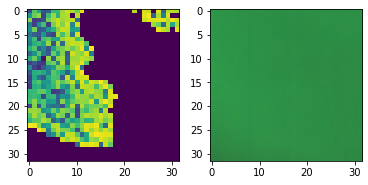

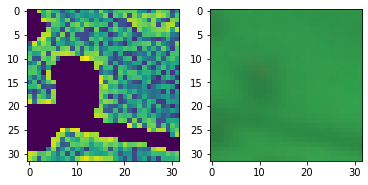

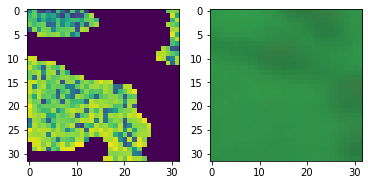

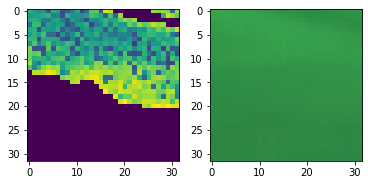

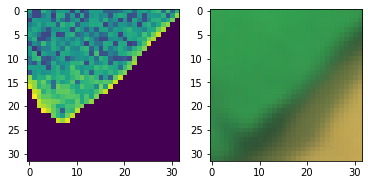

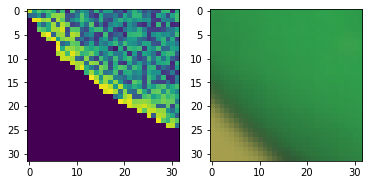

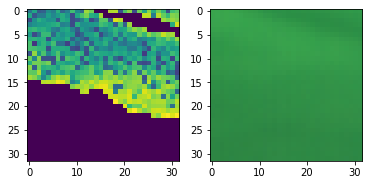

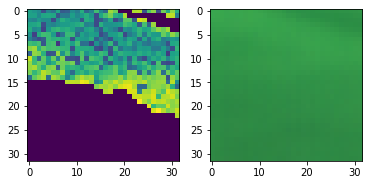

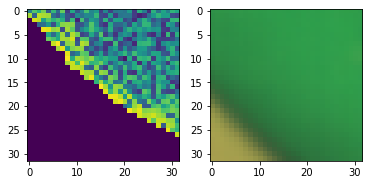

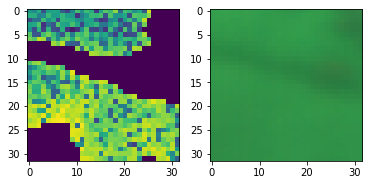

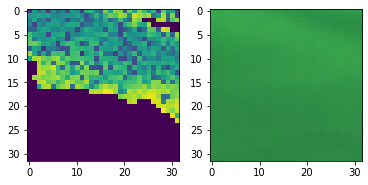

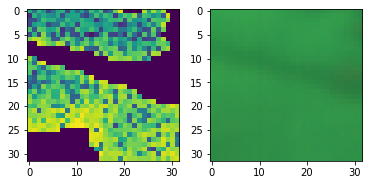

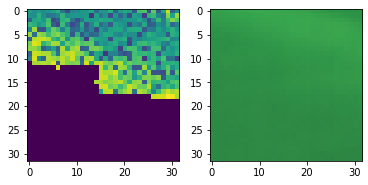

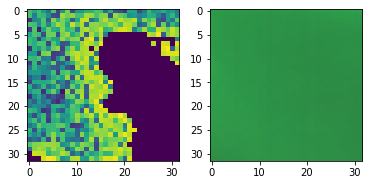

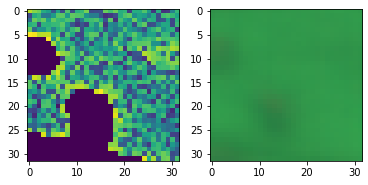

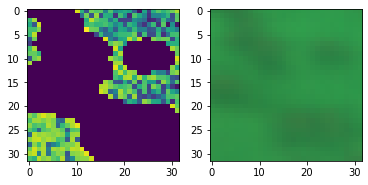

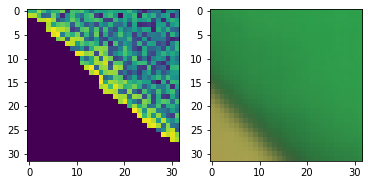

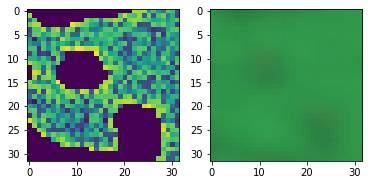

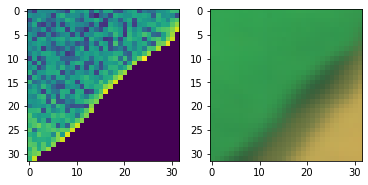

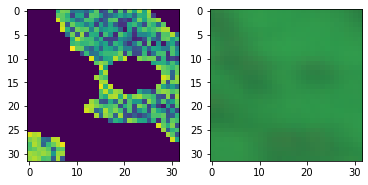

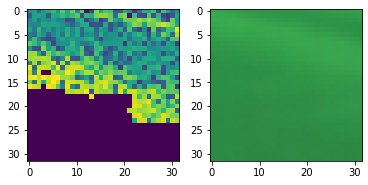

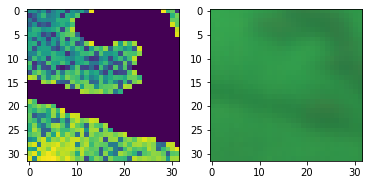

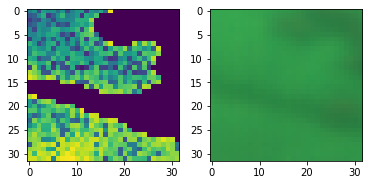

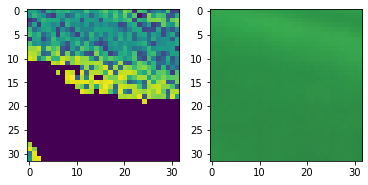

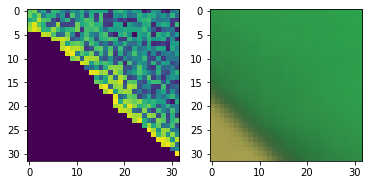

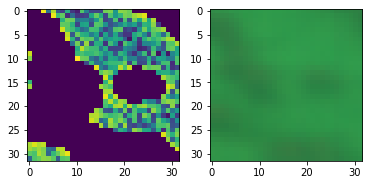

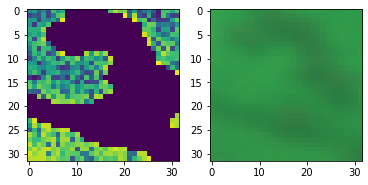

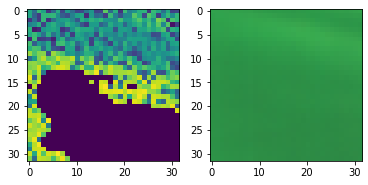

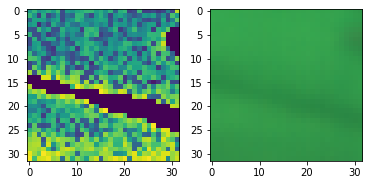

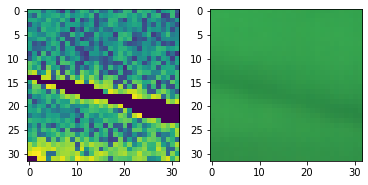

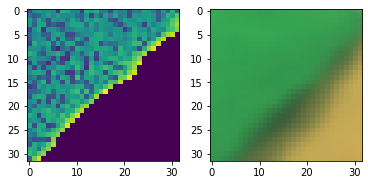

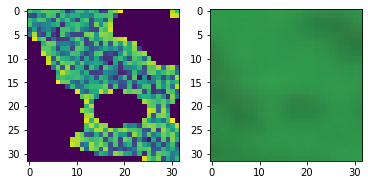

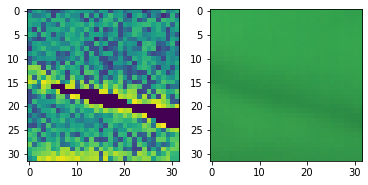

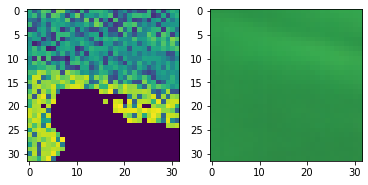

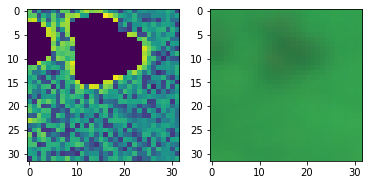

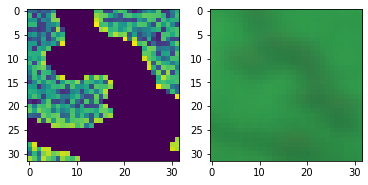

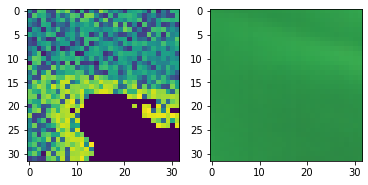

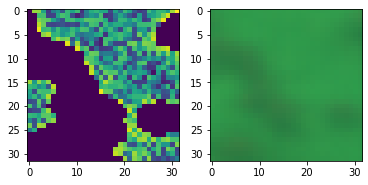

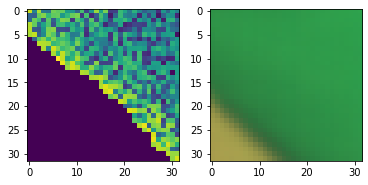

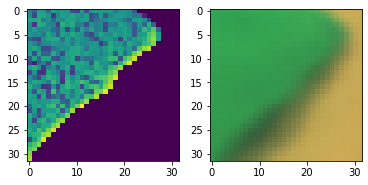

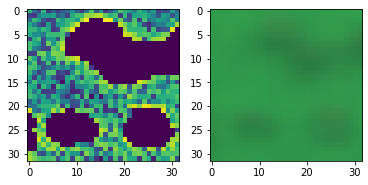

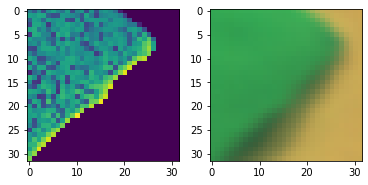

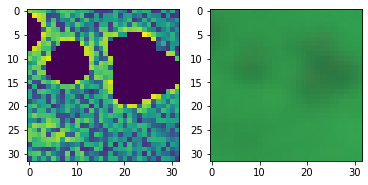

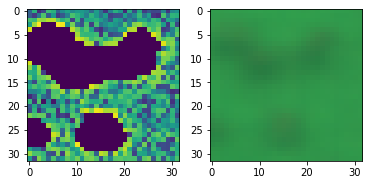

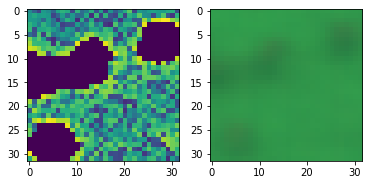

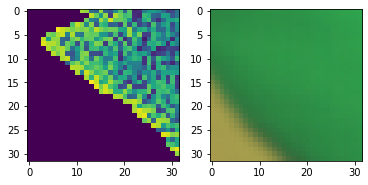

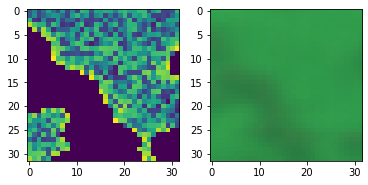

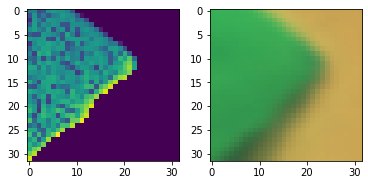

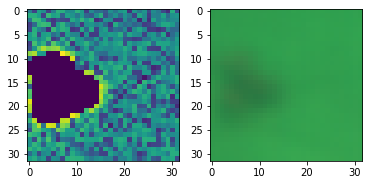

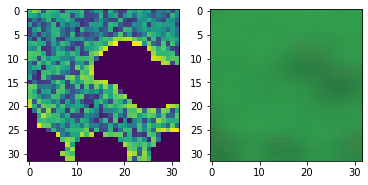

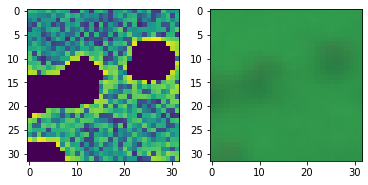

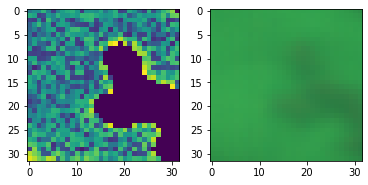

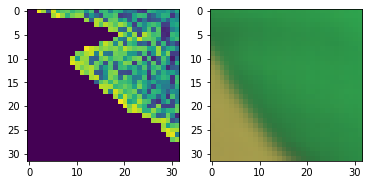

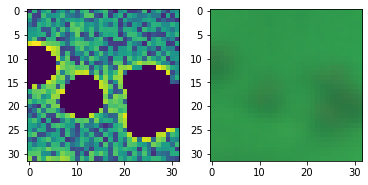

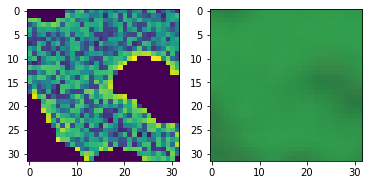

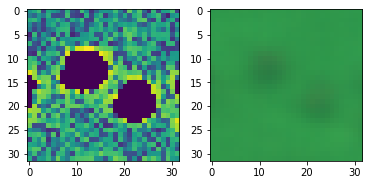

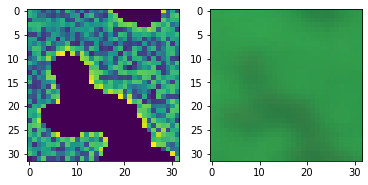

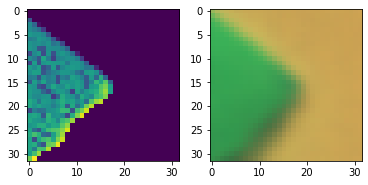

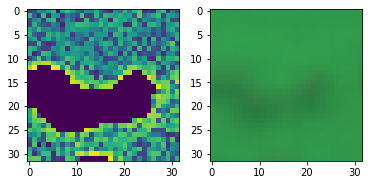

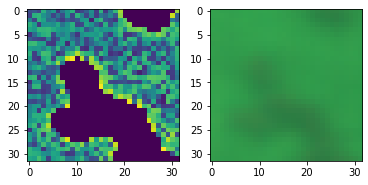

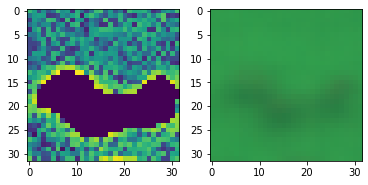

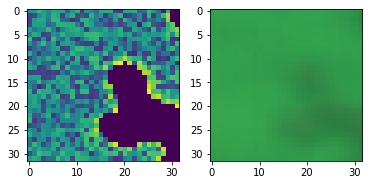

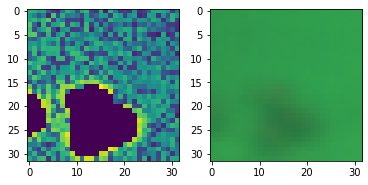

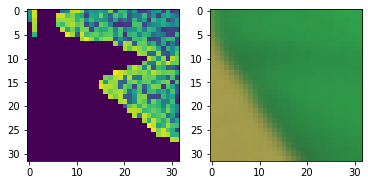

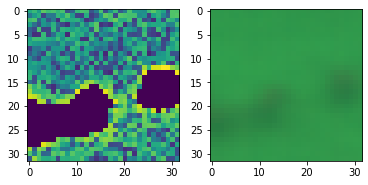

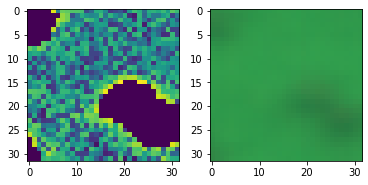

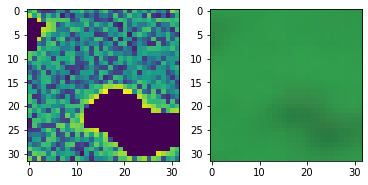

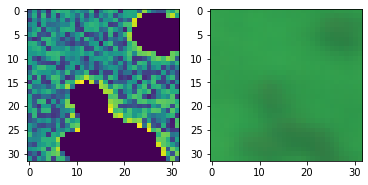

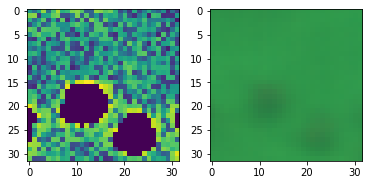

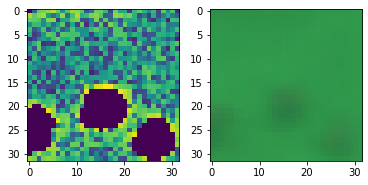

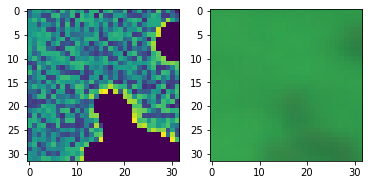

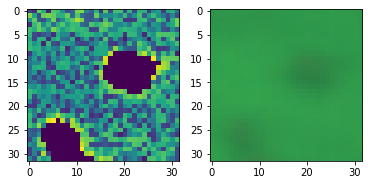

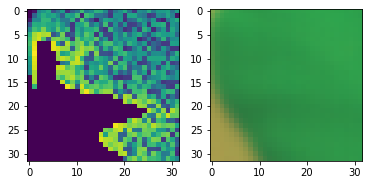

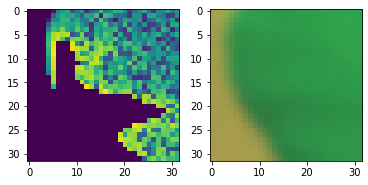

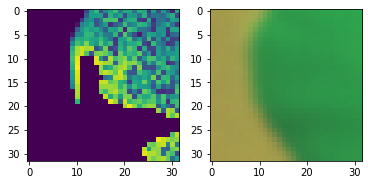

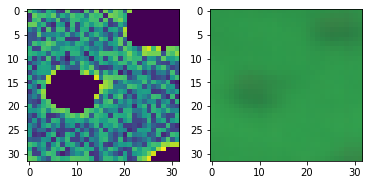

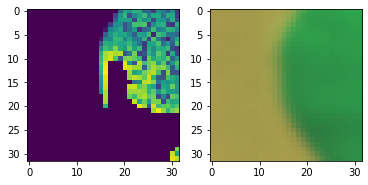

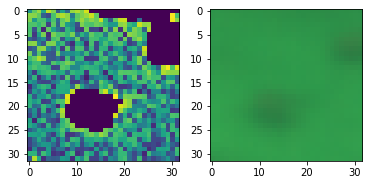

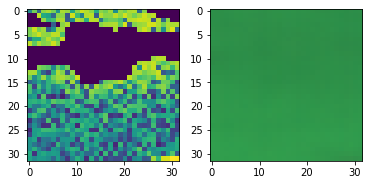

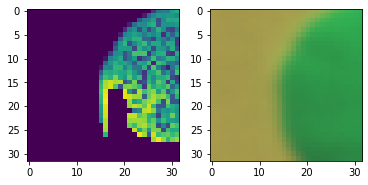

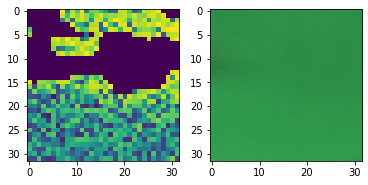

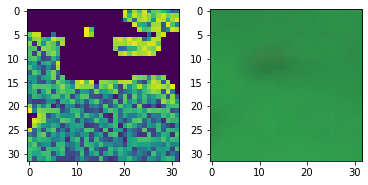

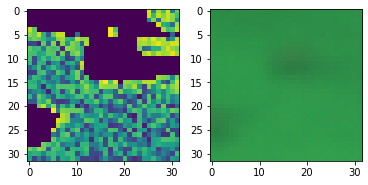

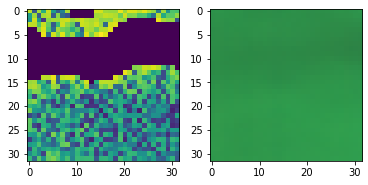

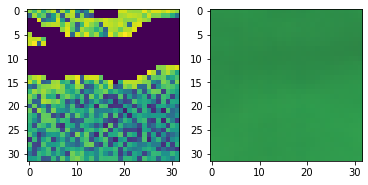

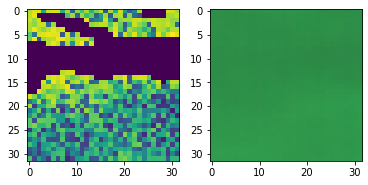

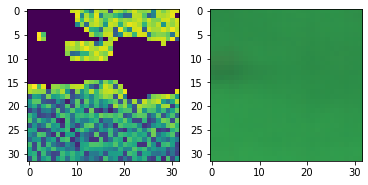

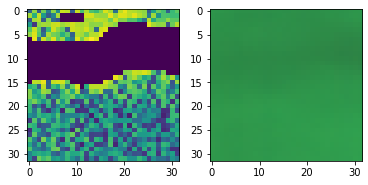

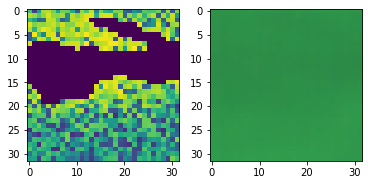

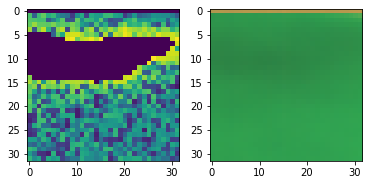

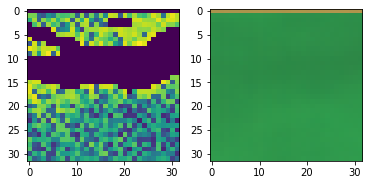

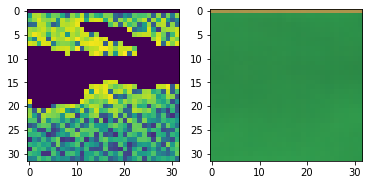

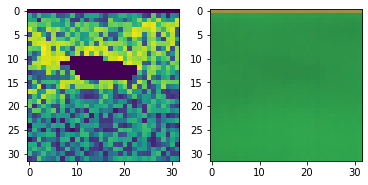

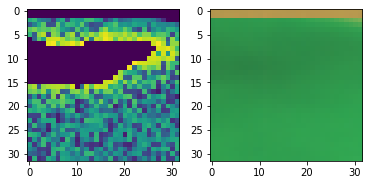

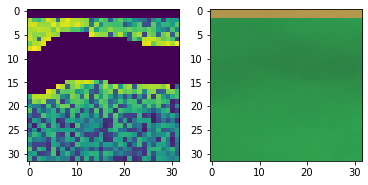

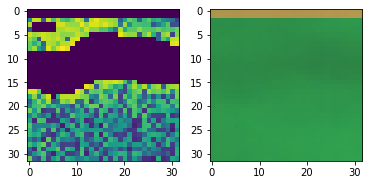

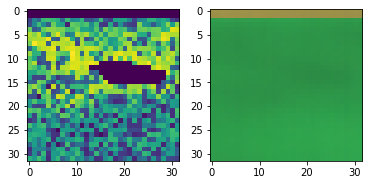

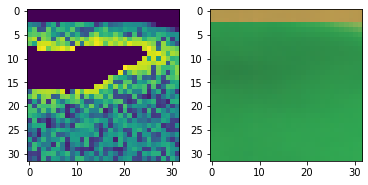

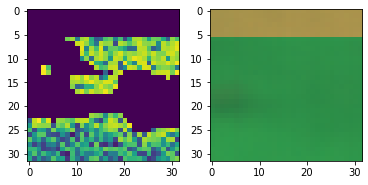

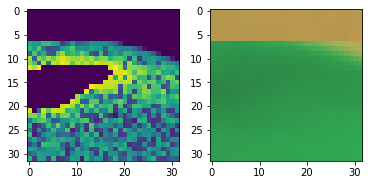

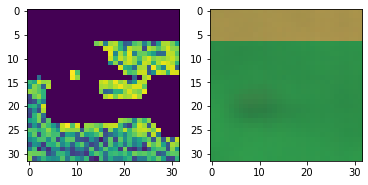

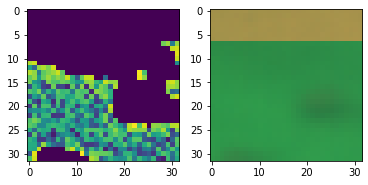

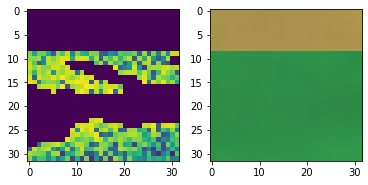

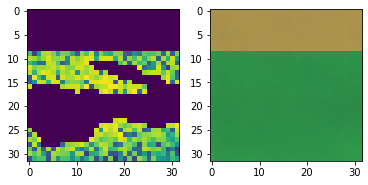

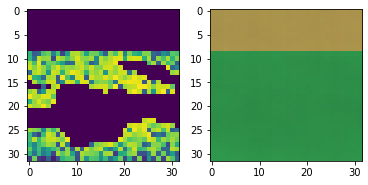

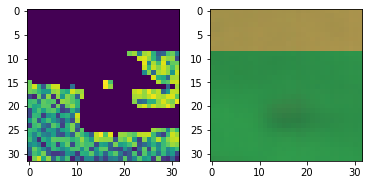

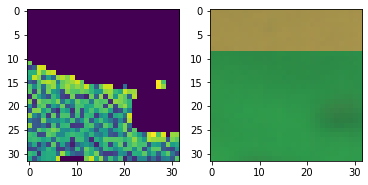

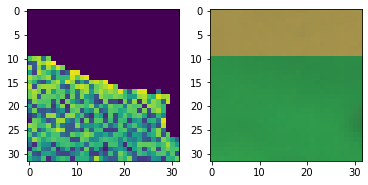

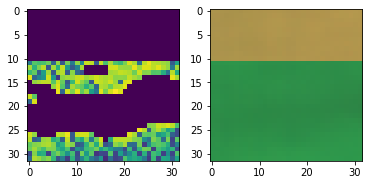

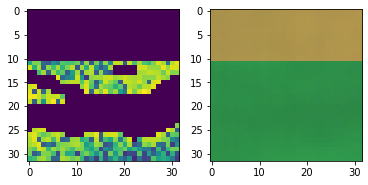

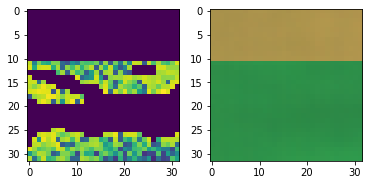

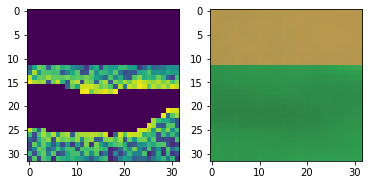

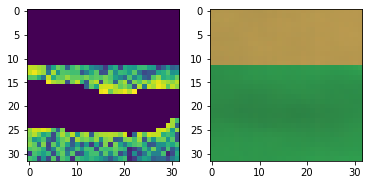

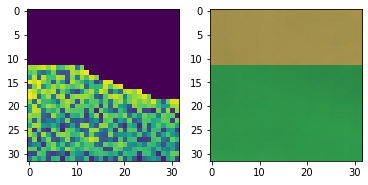

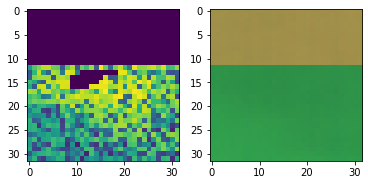

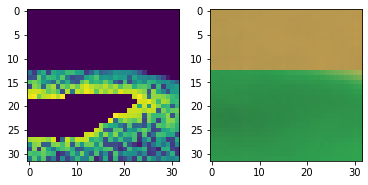

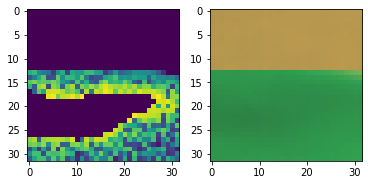

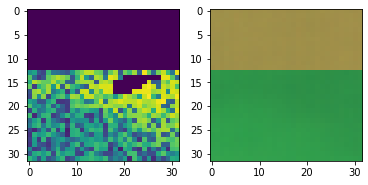

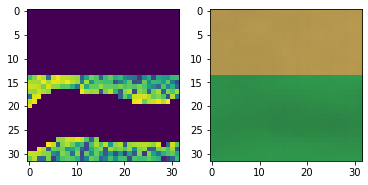

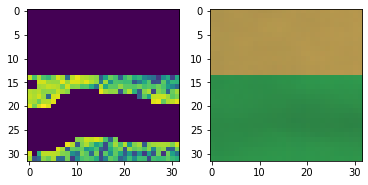

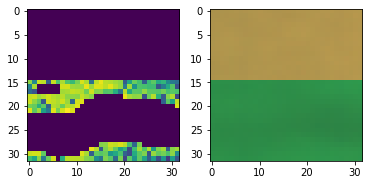

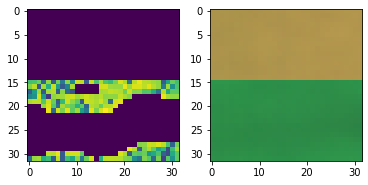

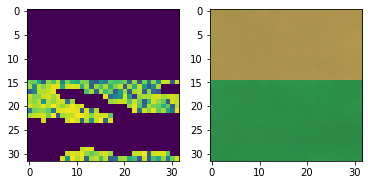

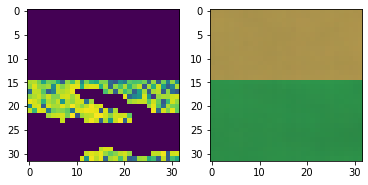

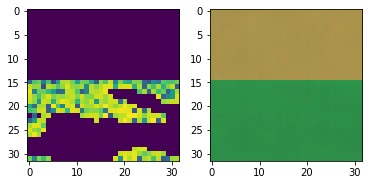

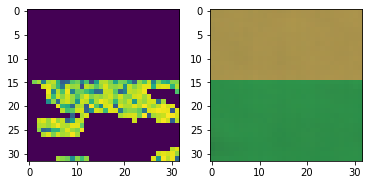

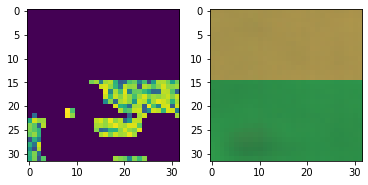

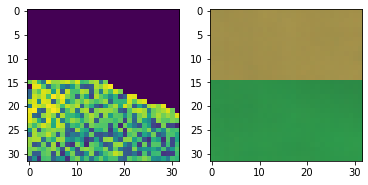

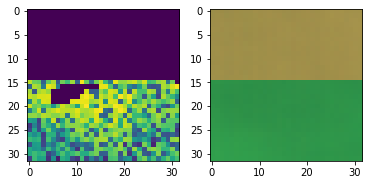

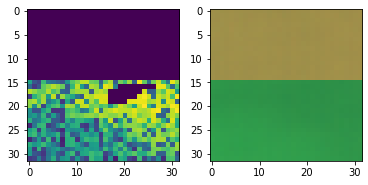

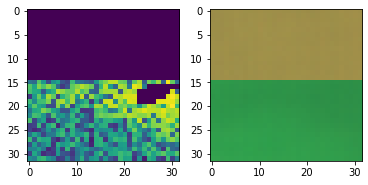

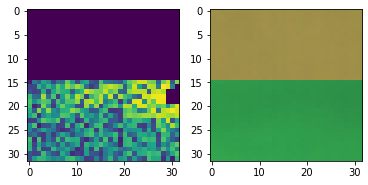

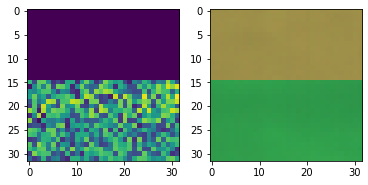

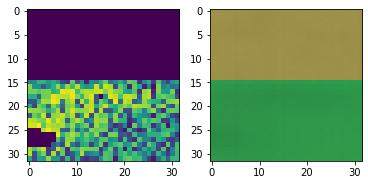

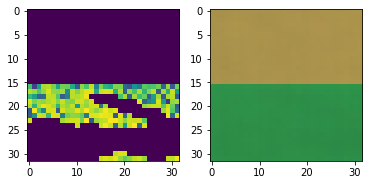

In [180]:
d = 16
for i in range(len(blobs_dog)):
    plt.figure()
    b = i
    x = int(blobs_dog[b][0])
    y = int(blobs_dog[b][1])
    plt.subplot(1, 2, 1)
    plt.imshow(cc.values.reshape(img_norm.shape[:2])[x-d:x+d,y-d:y+d])
    plt.subplot(1, 2, 2)
    plt.imshow(image.asarray()[x-d:x+d,y-d:y+d,[202,331,427]]/3000)
    # wave_lengths=(202,331,427), grid_step=5)
 

# Apply PCA + clustering


In [47]:
membership = extract_aphid_spectrum(img_zoom, pca_pc_chosen=3, nb_clusters = 4)

NameError: name 'extract_aphid_spectrum' is not defined

### Plot cluster memberships

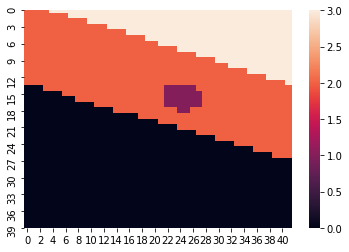

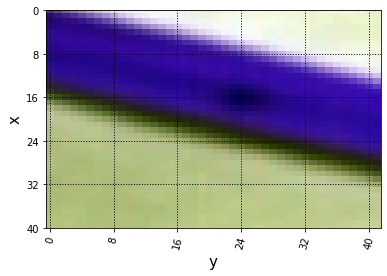

In [419]:
sns.heatmap(membership[:,:])
plot_spectra(img_zoom,  wave_lengths=(100,200,300), grid_step=5)

### Choose the animal cluster id

In [965]:
clust_id = 1

## Compute AVG spectrum and SD

In [966]:
c_img = img_zoom[membership[:,:]==clust_id]
avg_spectrum = pd.Series(c_img.mean(axis=0), index = wave_lengths)
std_spectrum = pd.Series(c_img.std(axis=0), index = wave_lengths)


### Plot the spectrum

Text(0.5, 0, 'Wave Length')

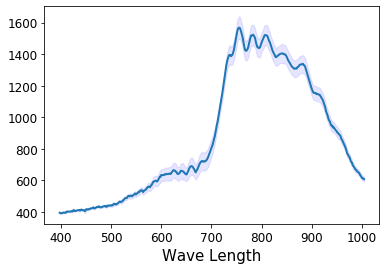

In [967]:
plt.plot(avg_spectrum, linewidth=2)
plt.fill_between(avg_spectrum.index, (avg_spectrum-std_spectrum), (avg_spectrum+std_spectrum), color='b', alpha=.1)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.xlabel("Wave Length",fontsize=15)

### Read references

In [968]:
dark_ref_path = current_dir+exp_name+'/capture/DARKREF_'+exp_name+'.hdr'
white_ref_path = current_dir+exp_name+'/capture/WHITEREF_'+exp_name+'.hdr'

In [969]:
dark_ref = sp.open_image(dark_ref_path)
dark_spectrum = dark_ref.asarray().reshape(-1,dark_ref.shape[2]).mean(axis=0)

white_ref = sp.open_image(white_ref_path)
white_spectrum = white_ref.asarray().reshape(-1,white_ref.shape[2]).mean(axis=0)

C:\Users\INSA LYON\Anaconda3\lib\site-packages\spectral\io\envi.py:195: UserWarning: Parameters with non-lowercase names encountered and converted to lowercase. To retain source file parameter name capitalization, set spectral.setttings.envi_support_nonlowercase_params to True.
  warnings.warn(msg)


Header parameter names converted to lower case.
Header parameter names converted to lower case.


### Normalize spectrum

In [970]:
norm_c_img = (c_img - dark_spectrum)/(white_spectrum - dark_spectrum)
norm_avg_spectrum = pd.Series(norm_c_img.mean(axis=0), index = wave_lengths)
norm_std_spectrum = pd.Series(norm_c_img.std(axis=0), index = wave_lengths)

### Plot normalized spectrum

Text(0.5, 0, 'Wave Length')

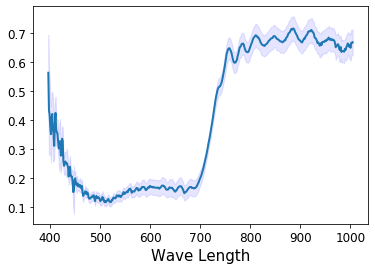

In [971]:
plt.plot(norm_avg_spectrum, linewidth=2)
plt.fill_between(norm_avg_spectrum.index, (norm_avg_spectrum-norm_std_spectrum), (norm_avg_spectrum+norm_std_spectrum), color='b', alpha=.1)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.xlabel("Wave Length",fontsize=15)

# Save spectrum aphid cluster

In [726]:
id_ = image_path.split("/")[-1].split(".")[0]

In [727]:
data_set_name_avg_raw = "spectrum_avg_raw.csv"
data_set_name_std_raw = "spectrum_std_raw.csv"
data_set_name_avg_norm = "spectrum_avg_norm.csv"
data_set_name_std_norm = "spectrum_std_norm.csv"

In [728]:
save_spectrum_to_file(avg_spectrum, id_, data_set_name_avg_raw)
save_spectrum_to_file(std_spectrum, id_, data_set_name_std_raw)
save_spectrum_to_file(norm_avg_spectrum, id_, data_set_name_avg_norm)
save_spectrum_to_file(norm_std_spectrum, id_, data_set_name_std_norm)

NameError: name 'avg_spectrum' is not defined